# Discover emerging trends
In this notebook, we analyze the trends of Stack Overflow questions. In particular, we are finding the percentage of new questions tagged from four popular Python data science libraries: matplotlib, numpy, scikit-learn, and pandas.

The data was retrieved from Stack Overflow's handy data explorer [using this query](http://data.stackexchange.com/stackoverflow/query/767327/select-all-posts-from-a-single-tag).

We use pandas stacked area plot, by quarter, the percentage of new questions added to stack overflow from those four libraries.

In [1]:
import pandas as pd

%matplotlib inline

In [2]:
import glob

In [10]:
dfs = [pd.read_csv(file_name, parse_dates=['creationdate']) 
           for file_name in glob.glob('../data/stackoverflow/*.csv')]
df = pd.concat(dfs)

In [11]:
df.head()

,creationdate,tagname
0,2008-09-22 12:36:53,matplotlib
1,2008-09-23 19:49:37,matplotlib
2,2008-12-01 21:24:44,matplotlib
3,2008-12-30 23:02:08,matplotlib
4,2009-01-19 16:30:57,matplotlib


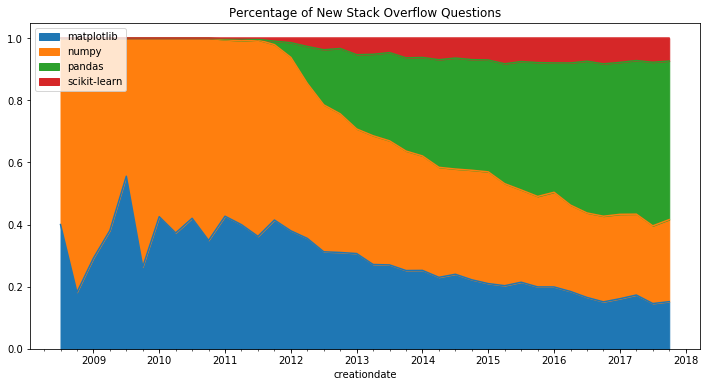

In [39]:
df.groupby([pd.Grouper(key='creationdate', freq='QS'), 'tagname']) \
  .size() \
  .unstack('tagname', fill_value=0) \
  .pipe(lambda x: x.div(x.sum(1), axis=0)) \
  .plot(kind='area', figsize=(12,6), title='Percentage of New Stack Overflow Questions') \
  .legend(loc='upper left')

Pandas has grown the fastest